## Keras examples

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import tensorflow as tf
from tensorflow import keras

Here we explore the fashion mnist dataset. contains 70000 grayscale
images of size 28 * 28 with 10 classes.

Though similar to MNIST contain handwritten digits, fashion mnist
is more complex compared to that dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [4]:
type(X_train)
X_train.dtype

numpy.ndarray

dtype('uint8')

In [5]:
import numpy as np

np.unique(y_train)
# so we need the target class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, 'Ankle boot')

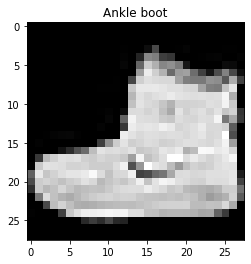

In [6]:
from matplotlib import pyplot as plt

img_plt = plt.imshow(X_train[0], cmap="gray")
plt.title(class_names[y_train[0]])

In [7]:
# split the dataset to development and validation set
X_dev, X_valid = X_train[5000:] / 255.0, X_train[:5000] / 255.0
y_dev, y_valid = y_train[5000:], y_train[:5000]

In [8]:
# creating model with 2 hidden layers
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=X_dev[0].shape))

# hidden layer that are fully connected
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))

# output layer with 10 neurons(1 per target class)
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
# all activation functions are available under keras.activations
dir(keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

Alternate way of creating Sequential model

```python
# we could also specify creating all the layers while creating
# the Sequential object itself
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_dev[0].shape),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation="softmax")
])
```

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


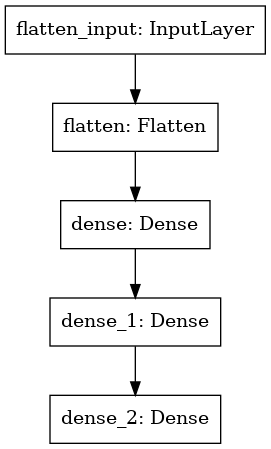

In [11]:
from tensorflow.keras import utils

# plot_model uses pydot which requires graphviz to be installed
# to install graphviz use this command `sudo apt install graphviz`.
utils.plot_model(model)

In [12]:
model.layers

In [13]:
hidden_layer_1 = model.layers[1]
hidden_layer_1.name

'dense'

In [14]:
# we can also fetch a layer by name
hidden2 = model.get_layer("dense_1")

In [15]:
# access the connection weights
weights, biases = hidden2.get_weights()
type(weights), weights.shape
type(biases), biases.shape

(numpy.ndarray, (300, 100))

(numpy.ndarray, (100,))

In [16]:
biases[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

keras was able to build the model because we have specified the
input shape. Otherwise keras will build the model only when we train
the actual model. Its recommended to specify the input shape at the
start itself.

In [17]:
# compiling the model
# here we specify the optimization technique and the loss function
# loss functions are under keras.losses
# optimizers are under keras.optimizers
# since we are using SGD as the optimizer, it is essential to
# scale the input data.(feature scaling, here we have normalized)
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=[keras.metrics.sparse_categorical_accuracy],
)

In [18]:
dir(keras.losses)

['BinaryCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossentropy',
 'squared_hinge']

In [19]:
dir(keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'schedules',
 'serialize']

In [20]:
dir(keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_accuracy',
 'binary_crossentropy',
 'categorica

In [21]:
history = model.fit(X_dev, y_dev, epochs=30, validation_data=(X_valid, y_valid), batch_size=64)

Epoch 1/30
860/860 [==============================] - 8s 9ms/step - loss: 1.1666 - sparse_categorical_accuracy: 0.6373 - val_loss: 0.6044 - val_sparse_categorical_accuracy: 0.7896
Epoch 2/30
860/860 [==============================] - 3s 3ms/step - loss: 0.5651 - sparse_categorical_accuracy: 0.8084 - val_loss: 0.4938 - val_sparse_categorical_accuracy: 0.8380
Epoch 3/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4934 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.4627 - val_sparse_categorical_accuracy: 0.8460
Epoch 4/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4577 - sparse_categorical_accuracy: 0.8418 - val_loss: 0.4542 - val_sparse_categorical_accuracy: 0.8398
Epoch 5/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4450 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.4314 - val_sparse_categorical_accuracy: 0.8480
Epoch 6/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4277 - sparse_categorica

In [22]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 860}

In [24]:
type(history.epoch)
history.epoch[:5]

list

[0, 1, 2, 3, 4]

In [25]:
history.model

In [26]:
type(history.history)
history.history.keys()

dict

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [27]:
import pandas as pd

training_results_df = pd.DataFrame(history.history)

In [28]:
training_results_df.columns

Index(['loss', 'sparse_categorical_accuracy', 'val_loss',
       'val_sparse_categorical_accuracy'],
      dtype='object')

<AxesSubplot:>

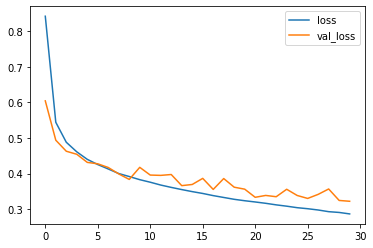

In [29]:
training_results_df.plot(y=["loss", "val_loss"])

<AxesSubplot:>

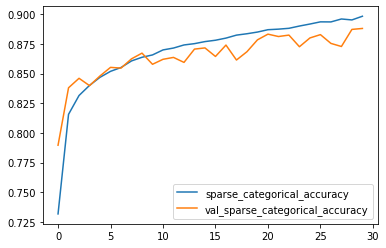

In [30]:
training_results_df.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"])

In [32]:
# evaluate model on a test set
model.evaluate(X_test / 255.0, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3590 - sparse_categorical_accuracy: 0.8704


[0.3589564561843872, 0.8704000115394592]

In [33]:
# predictions
X_new = X_test[:3] / 255.0
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
np.argmax(y_proba, axis=1), y_test[:3]
[class_names[c_idx] for c_idx in np.argmax(y_proba, axis=1)]

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

['Ankle boot', 'Pullover', 'Trouser']

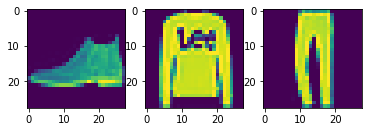

In [39]:
fig, axes = plt.subplots(1, X_new.shape[0])
for ax, img in zip(axes.ravel(), X_new):
    ax.imshow(img)